In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'C:\Users\vasu2.SIDHU\OneDrive\Desktop\real-estate-app\datasets\clean_data\gurgaon_properties_missing_value_imputation.csv')

In [4]:
df.shape

(3554, 19)

In [5]:
df.head()

,Unnamed: 0,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,flat,parsvnath green ville,sector 48,1.60,8377.0,3.0,3.0,3,13.0,Old Property,1700.0,0.0,0.0,0.0,0.0,1.0,2.0,119.0
1,1,house,independent,sector 43,8.25,30556.0,5.0,6.0,3+,3.0,Moderately Old,2700.0,1.0,1.0,1.0,1.0,0.0,2.0,64.0
2,3,flat,deepak minda,manesar,1.20,4528.0,3.0,3.0,3+,6.0,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
3,4,flat,emaar imperial gardens,sector 102,1.98,9900.0,3.0,3.0,3+,9.0,Relatively New,2222.0,0.0,1.0,0.0,0.0,0.0,2.0,72.0
4,6,flat,sare crescent parc,sector 92,0.49,4910.0,2.0,2.0,2,2.0,Relatively New,1109.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0


price_per_sqft is highly corealted to price itself
and if the user is being asked about their society preferences then the user can go and see the flat website


In [6]:
train_df = df.drop(columns=['society','price_per_sqft'])

In [7]:
train_df.head()

,Unnamed: 0,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,flat,sector 48,1.60,3.0,3.0,3,13.0,Old Property,1700.0,0.0,0.0,0.0,0.0,1.0,2.0,119.0
1,1,house,sector 43,8.25,5.0,6.0,3+,3.0,Moderately Old,2700.0,1.0,1.0,1.0,1.0,0.0,2.0,64.0
2,3,flat,manesar,1.20,3.0,3.0,3+,6.0,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0
3,4,flat,sector 102,1.98,3.0,3.0,3+,9.0,Relatively New,2222.0,0.0,1.0,0.0,0.0,0.0,2.0,72.0
4,6,flat,sector 92,0.49,2.0,2.0,2,2.0,Relatively New,1109.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0


### luxury score

<Axes: ylabel='luxury_score'>

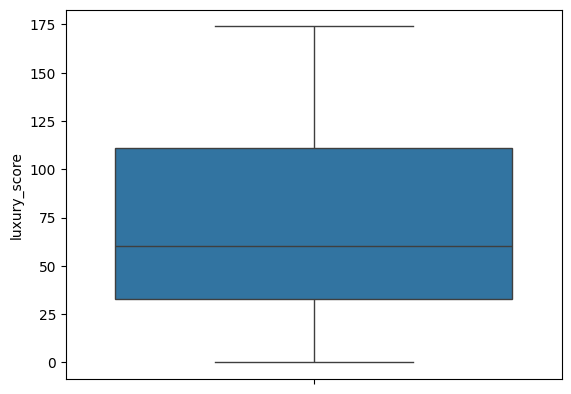

In [8]:
sns.boxplot(df['luxury_score'])

In [9]:
def categorize_luxury(score):
    if 0 <= score < 50:
        return "Low"
    elif 50 <= score < 150:
        return "Medium"
    elif 150 <= score <= 175:
        return "High"
    else:
        return None  # or "Undefined" or any other label for scores outside the defined bins

In [10]:
train_df['luxury_category'] = train_df['luxury_score'].apply(categorize_luxury)

In [11]:
train_df.head()

,Unnamed: 0,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category
0,0,flat,sector 48,1.60,3.0,3.0,3,13.0,Old Property,1700.0,0.0,0.0,0.0,0.0,1.0,2.0,119.0,Medium
1,1,house,sector 43,8.25,5.0,6.0,3+,3.0,Moderately Old,2700.0,1.0,1.0,1.0,1.0,0.0,2.0,64.0,Medium
2,3,flat,manesar,1.20,3.0,3.0,3+,6.0,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,Low
3,4,flat,sector 102,1.98,3.0,3.0,3+,9.0,Relatively New,2222.0,0.0,1.0,0.0,0.0,0.0,2.0,72.0,Medium
4,6,flat,sector 92,0.49,2.0,2.0,2,2.0,Relatively New,1109.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,Medium


### floorNum

<Axes: ylabel='floorNum'>

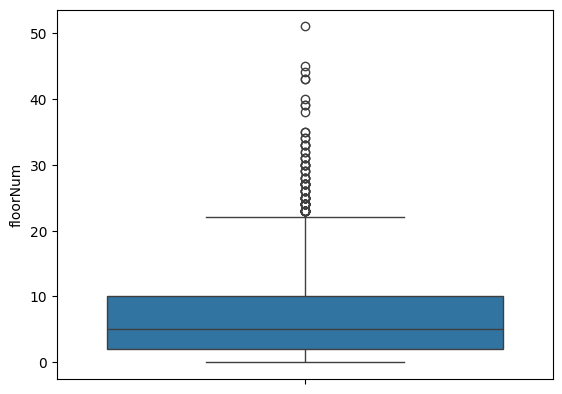

In [12]:
sns.boxplot(df['floorNum'])

In [13]:
def categorize_floor(floor):
    if 0 <= floor <= 2:
        return "Low Floor"
    elif 3 <= floor <= 10:
        return "Mid Floor"
    elif 11 <= floor <= 51:
        return "High Floor"
    else:
        return None  # or "Undefined" or any other label for floors outside the defined bins

In [14]:
train_df['floor_category'] = train_df['floorNum'].apply(categorize_floor)

In [15]:
train_df.head()

,Unnamed: 0,property_type,sector,price,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,luxury_category,floor_category
0,0,flat,sector 48,1.60,3.0,3.0,3,13.0,Old Property,1700.0,0.0,0.0,0.0,0.0,1.0,2.0,119.0,Medium,High Floor
1,1,house,sector 43,8.25,5.0,6.0,3+,3.0,Moderately Old,2700.0,1.0,1.0,1.0,1.0,0.0,2.0,64.0,Medium,Mid Floor
2,3,flat,manesar,1.20,3.0,3.0,3+,6.0,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,0.0,7.0,Low,Mid Floor
3,4,flat,sector 102,1.98,3.0,3.0,3+,9.0,Relatively New,2222.0,0.0,1.0,0.0,0.0,0.0,2.0,72.0,Medium,Mid Floor
4,6,flat,sector 92,0.49,2.0,2.0,2,2.0,Relatively New,1109.0,0.0,0.0,0.0,0.0,0.0,0.0,96.0,Medium,Low Floor


In [16]:
train_df.drop(columns=['floorNum','luxury_score'],inplace=True)

In [17]:
train_df.head()

,Unnamed: 0,property_type,sector,price,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0,flat,sector 48,1.60,3.0,3.0,3,Old Property,1700.0,0.0,0.0,0.0,0.0,1.0,2.0,Medium,High Floor
1,1,house,sector 43,8.25,5.0,6.0,3+,Moderately Old,2700.0,1.0,1.0,1.0,1.0,0.0,2.0,Medium,Mid Floor
2,3,flat,manesar,1.20,3.0,3.0,3+,Moderately Old,2944.0,0.0,1.0,0.0,0.0,0.0,0.0,Low,Mid Floor
3,4,flat,sector 102,1.98,3.0,3.0,3+,Relatively New,2222.0,0.0,1.0,0.0,0.0,0.0,2.0,Medium,Mid Floor
4,6,flat,sector 92,0.49,2.0,2.0,2,Relatively New,1109.0,0.0,0.0,0.0,0.0,0.0,0.0,Medium,Low Floor


In [18]:
from sklearn.preprocessing import OrdinalEncoder

# Create a copy of the original data for label encoding
data_label_encoded = train_df.copy()

categorical_cols = train_df.select_dtypes(include=['object']).columns

# Apply label encoding to categorical columns
for col in categorical_cols:
    oe = OrdinalEncoder()
    data_label_encoded[col] = oe.fit_transform(data_label_encoded[[col]])
    print(oe.categories_)

# Splitting the dataset into training and testing sets
X_label = data_label_encoded.drop('price', axis=1)
y_label = data_label_encoded['price']

[array(['flat', 'house'], dtype=object)]
[array(['dwarka expressway', 'gwal pahari', 'manesar', 'new',
       'new sector 2', 'sector 1', 'sector 102', 'sector 103',
       'sector 104', 'sector 105', 'sector 106', 'sector 107',
       'sector 108', 'sector 109', 'sector 10a', 'sector 11',
       'sector 110', 'sector 111', 'sector 112', 'sector 113',
       'sector 12', 'sector 13', 'sector 14', 'sector 15', 'sector 17',
       'sector 17a', 'sector 17b', 'sector 2', 'sector 21', 'sector 22',
       'sector 23', 'sector 24', 'sector 25', 'sector 26', 'sector 27',
       'sector 28', 'sector 3', 'sector 3 phase 2',
       'sector 3 phase 3 extension', 'sector 30', 'sector 31',
       'sector 33', 'sector 36', 'sector 36a', 'sector 37', 'sector 37c',
       'sector 37d', 'sector 38', 'sector 39', 'sector 4', 'sector 40',
       'sector 41', 'sector 43', 'sector 45', 'sector 46', 'sector 47',
       'sector 48', 'sector 49', 'sector 5', 'sector 50', 'sector 51',
       'sector 52', 'sect

In [19]:
X_label

,Unnamed: 0,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0,0.0,56.0,3.0,3.0,3.0,2.0,1700.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0
1,1,1.0,52.0,5.0,6.0,4.0,0.0,2700.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0
2,3,0.0,2.0,3.0,3.0,4.0,0.0,2944.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
3,4,0.0,6.0,3.0,3.0,4.0,3.0,2222.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0
4,6,0.0,107.0,2.0,2.0,2.0,3.0,1109.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,3798,0.0,63.0,4.0,6.0,3.0,3.0,2826.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
3550,3799,0.0,105.0,3.0,3.0,4.0,3.0,1600.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
3551,3800,1.0,38.0,2.0,3.0,1.0,3.0,999.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
3552,3801,0.0,85.0,4.0,5.0,4.0,3.0,2376.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0


In [20]:
y_label

0        1.60
1        8.25
2        1.20
3        1.98
4        0.49
        ...  
3549    11.00
3550     1.24
3551     0.70
3552     3.19
3553     1.80
Name: price, Length: 3554, dtype: float64

### Technique 1 - Correlation Analysis

<Axes: >

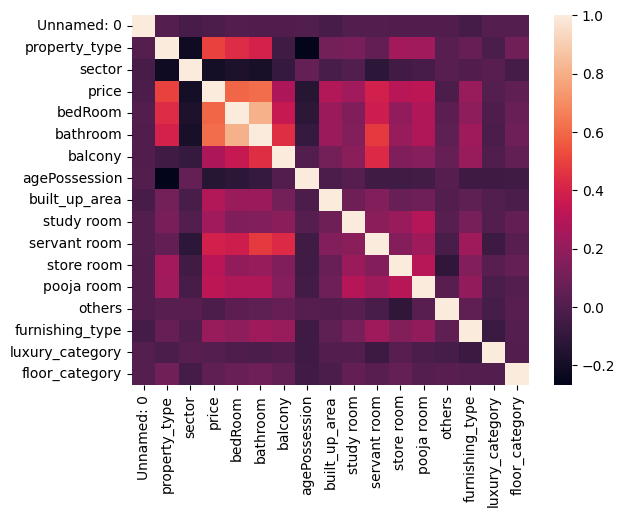

In [22]:
 sns.heatmap(data_label_encoded.corr())

In [23]:
fi_df1 = data_label_encoded.corr()['price'].iloc[1:].to_frame().reset_index().rename(columns={'index':'feature','price':'corr_coeff'})
fi_df1

,feature,corr_coeff
0,property_type,0.503996
1,sector,-0.200920
2,price,1.000000
3,bedRoom,0.589413
4,bathroom,0.611951
5,balcony,0.272447
6,agePossession,-0.136861
7,built_up_area,0.290460
8,study room,0.240031
9,servant room,0.393484


### Technique 2 - Random Forest Feature Importance

In [24]:
from sklearn.ensemble import RandomForestRegressor

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df2 = pd.DataFrame({
    'feature': X_label.columns,
    'rf_importance': rf_label.feature_importances_
}).sort_values(by='rf_importance', ascending=False)

fi_df2

,feature,rf_importance
7,built_up_area,0.620724
1,property_type,0.115484
2,sector,0.099165
0,Unnamed: 0,0.035399
3,bedRoom,0.025164
9,servant room,0.022655
4,bathroom,0.021261
5,balcony,0.011472
6,agePossession,0.011442
10,store room,0.008220


### Technique 3 - Gradient Boosting Feature importances

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

# Train a Random Forest regressor on label encoded data
gb_label = GradientBoostingRegressor()
gb_label.fit(X_label, y_label)

# Extract feature importance scores for label encoded data
fi_df3 = pd.DataFrame({
    'feature': X_label.columns,
    'gb_importance': gb_label.feature_importances_
}).sort_values(by='gb_importance', ascending=False)

fi_df3

,feature,gb_importance
7,built_up_area,0.662894
2,sector,0.104074
1,property_type,0.103249
3,bedRoom,0.038956
4,bathroom,0.038837
9,servant room,0.027529
10,store room,0.007970
0,Unnamed: 0,0.007811
6,agePossession,0.004329
13,furnishing_type,0.001446


### Technique 4 - Permutation Importance

In [27]:
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

X_train_label, X_test_label, y_train_label, y_test_label = train_test_split(X_label, y_label, test_size=0.2, random_state=42)

# Train a Random Forest regressor on label encoded data
rf_label = RandomForestRegressor(n_estimators=100, random_state=42)
rf_label.fit(X_train_label, y_train_label)

# Calculate Permutation Importance
perm_importance = permutation_importance(rf_label, X_test_label, y_test_label, n_repeats=30, random_state=42)

# Organize results into a DataFrame
fi_df4 = pd.DataFrame({
    'feature': X_label.columns,
    'permutation_importance': perm_importance.importances_mean
}).sort_values(by='permutation_importance', ascending=False)

fi_df4

,feature,permutation_importance
7,built_up_area,0.728285
1,property_type,0.203646
2,sector,0.171772
9,servant room,0.015803
0,Unnamed: 0,0.006139
4,bathroom,0.005322
6,agePossession,0.004364
8,study room,0.002629
5,balcony,0.002454
15,floor_category,0.001344


### Technique 5 - LASSO

LASSO relies on linear models, and since we are using ordinal encoding, hence in categorical cols some cols are given higher integer labels while some are given lower , this will result in developing linear models which treats categorical columns unevenly. hence tree based models are more reliable in such scenarios.


In [29]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_label)

# Train a LASSO regression model
# We'll use a relatively small value for alpha (the regularization strength) for demonstration purposes
lasso = Lasso(alpha=0.01, random_state=42)
lasso.fit(X_scaled, y_label)

# Extract coefficients
fi_df5 = pd.DataFrame({
    'feature': X_label.columns,
    'lasso_coeff': lasso.coef_
}).sort_values(by='lasso_coeff', ascending=False)

fi_df5


,feature,lasso_coeff
1,property_type,0.770921
4,bathroom,0.606591
3,bedRoom,0.411441
9,servant room,0.380140
7,built_up_area,0.375253
10,store room,0.244763
8,study room,0.217556
13,furnishing_type,0.133009
11,pooja room,0.116722
14,luxury_category,0.080537


### Technique 6 - RFE

In [30]:
from sklearn.feature_selection import RFE

# Initialize the base estimator
estimator = RandomForestRegressor()

# Apply RFE on the label-encoded and standardized training data
selector_label = RFE(estimator, n_features_to_select=X_label.shape[1], step=1)
selector_label = selector_label.fit(X_label, y_label)

# Get the selected features based on RFE
selected_features = X_label.columns[selector_label.support_]

# Extract the coefficients for the selected features from the underlying linear regression model
selected_coefficients = selector_label.estimator_.feature_importances_

# Organize the results into a DataFrame
fi_df6 = pd.DataFrame({
    'feature': selected_features,
    'rfe_score': selected_coefficients
}).sort_values(by='rfe_score', ascending=False)

fi_df6


,feature,rfe_score
7,built_up_area,0.624917
1,property_type,0.115028
2,sector,0.098800
0,Unnamed: 0,0.032831
3,bedRoom,0.026112
4,bathroom,0.023902
9,servant room,0.021363
6,agePossession,0.011562
5,balcony,0.010069
11,pooja room,0.006541


### Technique 7 - Linear Regression Weights

In [33]:
# First, import LinearRegression
from sklearn.linear_model import LinearRegression
import pandas as pd

# Now your code will work (assuming X_scaled, y_label, X_label are defined)
lin_reg = LinearRegression()
lin_reg.fit(X_scaled, y_label)

fi_df7 = pd.DataFrame({
    'feature': X_label.columns,
    'reg_coeffs': lin_reg.coef_
}).sort_values(by='reg_coeffs', ascending=False, key=abs)  # Sort by absolute coefficient values

fi_df7

,feature,reg_coeffs
1,property_type,0.776746
4,bathroom,0.603806
3,bedRoom,0.411859
9,servant room,0.382724
7,built_up_area,0.382087
10,store room,0.247275
8,study room,0.223763
13,furnishing_type,0.139624
2,sector,-0.138983
11,pooja room,0.119745


### Technique 8 - SHAP

In [34]:
!pip install shap

  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
   ---------------------------------------- 0.0/545.1 kB ? eta -:--:--
   ------------------- -------------------- 262.1/545.1 kB ? eta -:--:--
   ---------------------------------------- 545.1/545.1 kB 1.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ------- -------------------------------- 0.5/2.8 MB 2.8 MB/s eta 0:00:01
   -------------- ------------------------- 1.0/2.8 MB 3.0 MB/s eta 0:00:01
   ---------------------- ----------------- 1.6/2.8 MB 3.1 MB/s eta 0:00:01
   --------------------------------- ------ 2.4/2.8 MB 3.1 MB/s eta 0:00:01
   ---------------------------------------- 2.8/2.8 MB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/30.3 MB ? eta -:--:--
    --------------------------------------- 0.5/30.3 MB 3.3 MB/s eta 0:00:10
   -- ------------------------------------- 1.6/30.3 MB 3.8 MB/s eta 0:00:08
   -- ------------------------------------

In [35]:
import shap

# Compute SHAP values using the trained Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_label, y_label)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_label)

# Summing the absolute SHAP values across all samples to get an overall measure of feature importance
shap_sum = np.abs(shap_values).mean(axis=0)

shap_values


c:\Users\vasu2.SIDHU\OneDrive\Desktop\real-estate-app\ReEst_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


array([[ 0.00282071, -0.26696705,  0.2708598 , ..., -0.00755062,
        -0.00780271,  0.03974781],
       [ 0.39701492,  1.37255761,  0.66481096, ...,  0.01796759,
         0.00582785, -0.01520245],
       [ 0.12818463, -1.00728178, -1.61689109, ..., -0.01659243,
        -0.00347823, -0.02467437],
       ...,
       [ 0.11725669,  0.50351812,  0.08815508, ..., -0.021749  ,
        -0.01033694, -0.01072725],
       [ 0.25984565, -0.37256694,  0.118192  , ...,  0.03107521,
         0.0491564 ,  0.07772306],
       [ 0.22345219,  0.57081336,  0.18456901, ..., -0.01386127,
        -0.00673595,  0.04401159]], shape=(3554, 16))

In [36]:
fi_df8 = pd.DataFrame({
    'feature': X_label.columns,
    'SHAP_score': np.abs(shap_values).mean(axis=0)
}).sort_values(by='SHAP_score', ascending=False)

fi_df8

,feature,SHAP_score
7,built_up_area,1.245198
1,property_type,0.502001
2,sector,0.385597
4,bathroom,0.109028
9,servant room,0.101581
3,bedRoom,0.055657
0,Unnamed: 0,0.044691
5,balcony,0.042922
6,agePossession,0.023587
15,floor_category,0.022114


In [37]:
final_fi_df = fi_df1.merge(fi_df2,on='feature').merge(fi_df3,on='feature').merge(fi_df4,on='feature').merge(fi_df5,on='feature').merge(fi_df6,on='feature').merge(fi_df7,on='feature').merge(fi_df8,on='feature').set_index('feature')

In [38]:
final_fi_df


,corr_coeff,rf_importance,gb_importance,permutation_importance,lasso_coeff,rfe_score,reg_coeffs,SHAP_score
feature,,,,,,,,
property_type,0.503996,0.115484,0.103249,0.203646,0.770921,0.115028,0.776746,0.502001
sector,-0.200920,0.099165,0.104074,0.171772,-0.130869,0.098800,-0.138983,0.385597
bedRoom,0.589413,0.025164,0.038956,-0.008330,0.411441,0.026112,0.411859,0.055657
bathroom,0.611951,0.021261,0.038837,0.005322,0.606591,0.023902,0.603806,0.109028
balcony,0.272447,0.011472,0.001005,0.002454,0.055330,0.010069,0.062158,0.042922
agePossession,-0.136861,0.011442,0.004329,0.004364,-0.008530,0.011562,-0.015785,0.023587
built_up_area,0.290460,0.620724,0.662894,0.728285,0.375253,0.624917,0.382087,1.245198
study room,0.240031,0.005224,0.001246,0.002629,0.217556,0.004975,0.223763,0.013636
servant room,0.393484,0.022655,0.027529,0.015803,0.380140,0.021363,0.382724,0.101581


In [39]:
# normalize the score
final_fi_df = final_fi_df.divide(final_fi_df.sum(axis=0), axis=1)

In [40]:
final_fi_df[['rf_importance','gb_importance','permutation_importance','rfe_score','SHAP_score']].mean(axis=1).sort_values(ascending=False)

feature
built_up_area      0.617942
property_type      0.143832
sector             0.122528
bathroom           0.026620
servant room       0.025386
bedRoom            0.021326
balcony            0.008443
agePossession      0.008249
store room         0.005573
floor_category     0.004151
furnishing_type    0.004049
study room         0.003892
luxury_category    0.003434
pooja room         0.002897
others             0.001677
dtype: float64

In [41]:
# to drop pooja room, study room, others
X_label

,Unnamed: 0,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_category,floor_category
0,0,0.0,56.0,3.0,3.0,3.0,2.0,1700.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0
1,1,1.0,52.0,5.0,6.0,4.0,0.0,2700.0,1.0,1.0,1.0,1.0,0.0,2.0,2.0,2.0
2,3,0.0,2.0,3.0,3.0,4.0,0.0,2944.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0
3,4,0.0,6.0,3.0,3.0,4.0,3.0,2222.0,0.0,1.0,0.0,0.0,0.0,2.0,2.0,2.0
4,6,0.0,107.0,2.0,2.0,2.0,3.0,1109.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,3798,0.0,63.0,4.0,6.0,3.0,3.0,2826.0,0.0,1.0,0.0,0.0,0.0,1.0,2.0,2.0
3550,3799,0.0,105.0,3.0,3.0,4.0,3.0,1600.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
3551,3800,1.0,38.0,2.0,3.0,1.0,3.0,999.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
3552,3801,0.0,85.0,4.0,5.0,4.0,3.0,2376.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0


In [42]:
# with all the cols
from sklearn.model_selection import cross_val_score

rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label, y_label, cv=5, scoring='r2')

In [43]:
scores.mean()

np.float64(0.7806543289715658)

In [44]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)

scores = cross_val_score(rf, X_label.drop(columns=['pooja room', 'study room', 'others']), y_label, cv=5, scoring='r2')

In [45]:
scores.mean()

np.float64(0.784564659160551)

In [46]:
export_df = X_label.drop(columns=['pooja room', 'study room', 'others'])
export_df['price'] = y_label

In [47]:
export_df.to_csv('gurgaon_properties_post_feature_selection.csv', index=False)

In [348]:
export_df

,property_type,sector,bedRoom,bathroom,balcony,agePossession,built_up_area,servant room,store room,furnishing_type,luxury_category,floor_category,price
0,0,36,3.0,2.0,2,1,850.0,0.0,0.0,0.0,1,1,0.82
1,0,95,2.0,2.0,2,1,1226.0,1.0,0.0,0.0,1,2,0.95
2,0,103,2.0,2.0,1,1,1000.0,0.0,0.0,0.0,1,0,0.32
3,0,99,3.0,4.0,4,3,1615.0,1.0,0.0,1.0,0,2,1.60
4,0,5,2.0,2.0,1,3,582.0,0.0,1.0,0.0,0,2,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3549,0,90,2.0,2.0,1,3,532.0,0.0,0.0,0.0,2,2,0.37
3550,1,12,5.0,5.0,4,3,6228.0,1.0,1.0,0.0,0,1,6.00
3551,0,23,1.0,1.0,1,0,665.0,0.0,0.0,1.0,2,2,0.60
3552,1,44,5.0,6.0,3,0,5490.0,1.0,1.0,0.0,2,2,15.50
